In [50]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../csv_files/space_missions_utf8.csv")
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.width', 1000)  # increase width

In [3]:
df

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
...,...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,06:22:00,Long March 5B,Wentian,Active,NaN,Success
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67,Success
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,04:12:00,Zhongke-1A,Demo Flight,Active,NaN,Success


Company
RVSN USSR           1777
CASC                 338
Arianespace          293
General Dynamics     251
VKS RF               216
NASA                 203
SpaceX               182
US Air Force         161
ULA                  151
Boeing               136
Name: count, dtype: int64


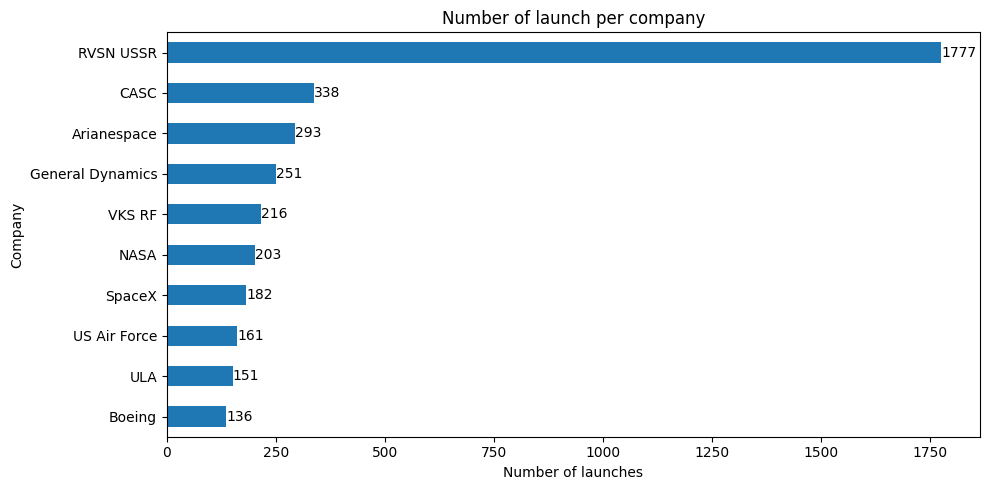

In [110]:
# Count occurences of each comapny 
company_counts = df['Company'].value_counts().head(10)
print(company_counts)

#Sort
company_counts = company_counts.sort_values(ascending=True)
    
# Plot the graph
plt.figure(figsize=(10, 5))
ax = company_counts.plot(kind='barh')

# Adding labels on bars
for index, value in enumerate(company_counts):
    ax.text(value, index, str(value), va='center')

plt.xlabel('Number of launches')
plt.ylabel('Company')
plt.title('Number of launch per company')
plt.tight_layout()
plt.savefig('graphs/top_10_companies.png') #save in 
plt.show()

In [119]:
def split_location(location):

#split 'location' on parts containing datas:
    
    parts = location.split(', ')
    
    site = None
    cosmodrome = None
    state = None
    country = None
    
    if len(parts) == 4:
        # Format: site, cosmodrome, state, country
        site = parts[0]
        cosmodrome = parts[1]
        state = parts[2]
        country = parts[3]
    elif len(parts) == 3:
        # Format: site, cosmodrome, country
        site = parts[0]
        cosmodrome = parts[1]
        state = None
        country = parts[2]
    elif len(parts) == 2:
        # Format: cosmodrome, country
        site = None
        cosmodrome = parts[0]
        state = None
        country = parts[1]
    elif len(parts) == 1:
        # Format: country
        site = None
        cosmodrome = None
        state = None
        country = parts[0]
    
    return site, cosmodrome, state, country

df_for_cosmodromes = df.copy()
df_for_cosmodromes[['Site', 'Cosmodrome', 'State', 'Country']] = df['Location'].apply(split_location).apply(pd.Series)




In [116]:
df_for_cosmodromes

Cosmodrome
Plesetsk Cosmodrome                1278
Baikonur Cosmodrome                 719
Cape Canaveral AFS                  658
Vandenberg AFB                      442
Guiana Space Centre                 314
Kennedy Space Center                205
Jiuquan Satellite Launch Center     144
Xichang Satellite Launch Center     130
Kapustin Yar                        112
Tanegashima Space Center             88
Name: count, dtype: int64


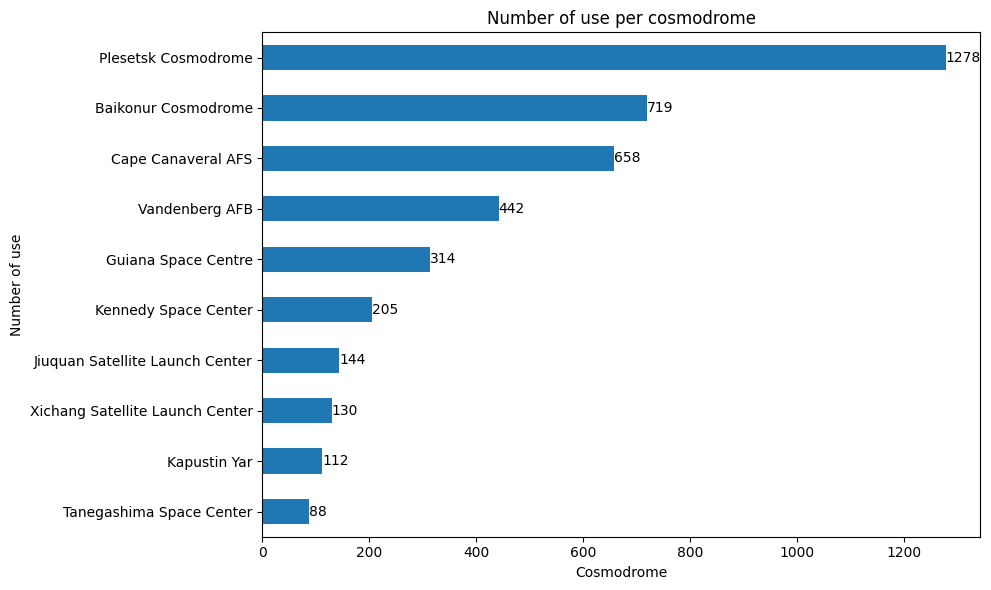

In [109]:
# Count occurences of each cosmodrome 
cosmodrome_counts = df_for_cosmodromes['Cosmodrome'].value_counts().head(10)
print(cosmodrome_counts)

#Sort
cosmodrome_counts = cosmodrome_counts.sort_values(ascending=True)
    
# Plot the graph
plt.figure(figsize=(10, 6))
ax = cosmodrome_counts.plot(kind='barh')

# Adding labels on bars
for index, value in enumerate(cosmodrome_counts):
    ax.text(value, index, str(value), va='center')

plt.xlabel('Cosmodrome')
plt.ylabel('Number of use')
plt.title('Number of use per cosmodrome')
plt.tight_layout()
plt.savefig('graphs/top_10_cosmodromes.png') #save in 
plt.show()

C:\Users\Szymon\AppData\Local\Temp\ipykernel_9372\516536860.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['Date'] = pd.to_datetime(df_date['Date'])
C:\Users\Szymon\AppData\Local\Temp\ipykernel_9372\516536860.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['Year'] = df_date['Date'].dt.year


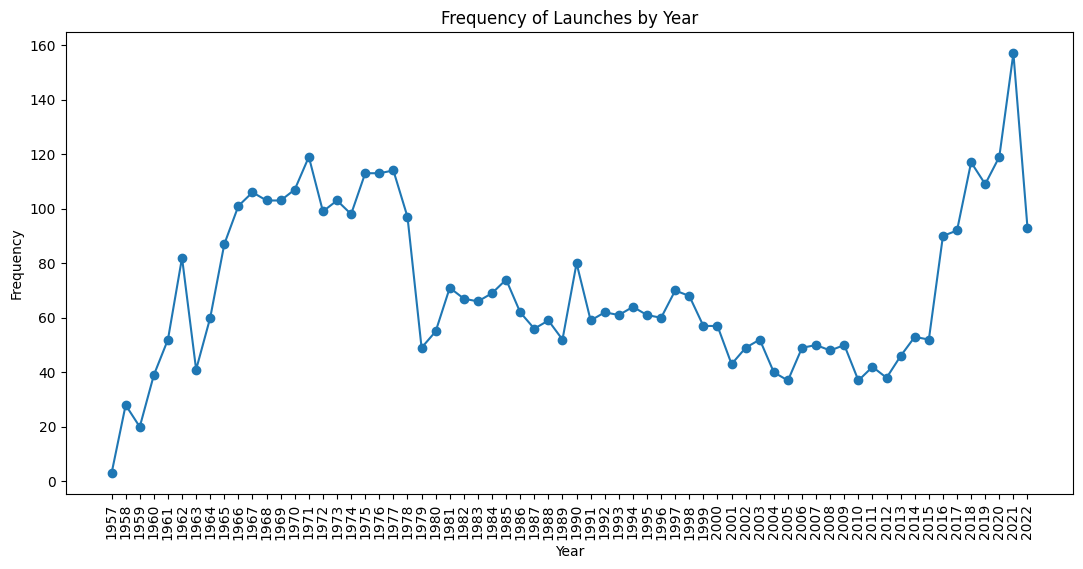

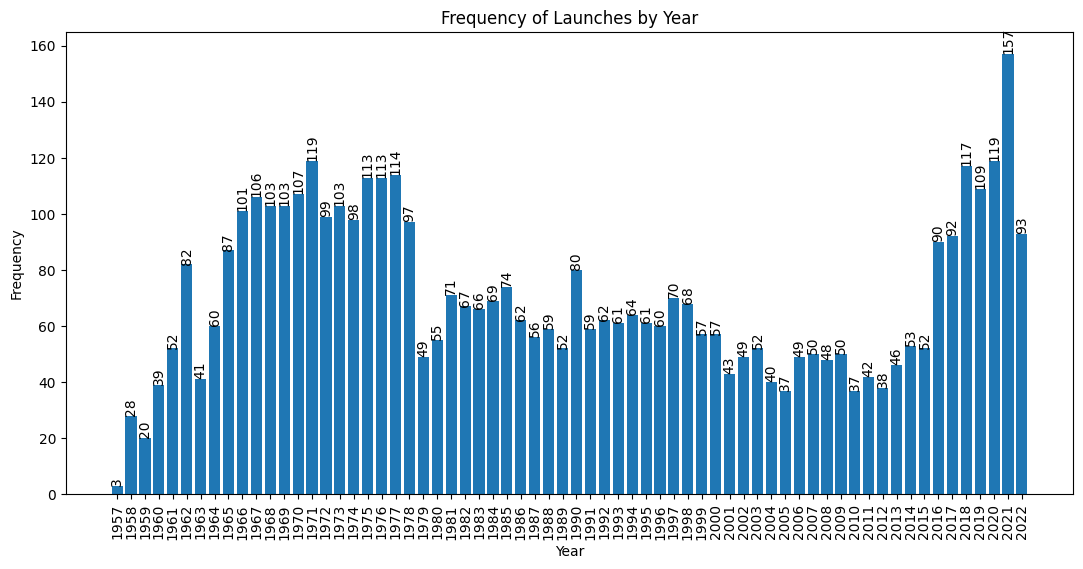

In [166]:
#Create new dataframe for 'Date' column
df_date = df[['Date']]

#Change datatype for datetime format
df_date['Date'] = pd.to_datetime(df_date['Date'])

#Adding column to df_date 
df_date['Year'] = df_date['Date'].dt.year

#check occurrences 'Year'
year_counts = df_date['Year'].value_counts().reset_index()

#Change column name
year_counts.columns = ['Year', 'Frequency']

#Sort by 'Year'
year_counts = year_counts.sort_values(by='Year')


# Plot the graph
plt.figure(figsize=(13, 6))
plt.plot(year_counts['Year'], year_counts['Frequency'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Launches by Year')
plt.xticks(year_counts['Year'], rotation=90)
plt.show()

#two types of graph

plt.figure(figsize=(13, 6))
bars = plt.bar(year_counts['Year'], year_counts['Frequency'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', rotation = 90)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Launches by Year')
plt.xticks(year_counts['Year'], rotation = 90)
plt.savefig('graphs/years_freq.png') #save in 
plt.show()

In [67]:
#Create dataframe: group by 'Company' and 'MissionStatus', count ocurrences in each group, 
mission_status_counts = df.groupby(['Company', 'MissionStatus']).size().unstack(fill_value=0)


mission_status_counts['Sum'] = mission_status_counts['Failure']+mission_status_counts['Partial Failure']+mission_status_counts['Prelaunch Failure']+mission_status_counts['Success']

mission_status_counts = mission_status_counts[mission_status_counts['Sum'] >= 10]

mission_status_counts['Success rate[%]'] = ((mission_status_counts['Success'])/(mission_status_counts['Sum']))*100

mission_status_counts = mission_status_counts.sort_values(by='Success rate[%]', ascending=False)
print(mission_status_counts.head(20))

#mission_status_counts_10_launch['Success rate'] = ((mission_status_counts['Success'])/(mission_status_counts['Failure']+mission_status_counts['Partial Failure']+mission_status_counts['Prelaunch Failure']+mission_status_counts['Success']))*100

#ax = mission_status_counts.plot.bar(x='Caompany')
#print(mission_status_counts)
#plt.show()
#plt.bar(mission_status_counts['Company'], mission_status_counts['Success rate'])
#print(mission_status_counts.head(20))

MissionStatus    Failure  Partial Failure  Prelaunch Failure  Success   Sum  Success rate[%]
Company                                                                                     
Blue Origin            0                0                  0       21    21       100.000000
Starsem                0                0                  0       10    10       100.000000
ULA                    0                1                  0      150   151        99.337748
ILS                    0                1                  0       45    46        97.826087
Boeing                 3                2                  0      131   136        96.323529
Arianespace            8                3                  0      282   293        96.245734
Kosmotras              1                0                  0       21    22        95.454545
MHI                    2                2                  0       83    87        95.402299
SpaceX                 5                4                  1      172 

C:\Users\Szymon\AppData\Local\Temp\ipykernel_15124\2750573696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['Date'] = pd.to_datetime(df_date['Date'])
C:\Users\Szymon\AppData\Local\Temp\ipykernel_15124\2750573696.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['Month'] = df_date['Date'].dt.month


    Month  Frequency
11      1        284
9       2        361
7       3        378
2       4        409
10      5        350
1       6        431
6       7        380
4       8        391
5       9        386
3      10        403
8      11        365
0      12        492
---------------------


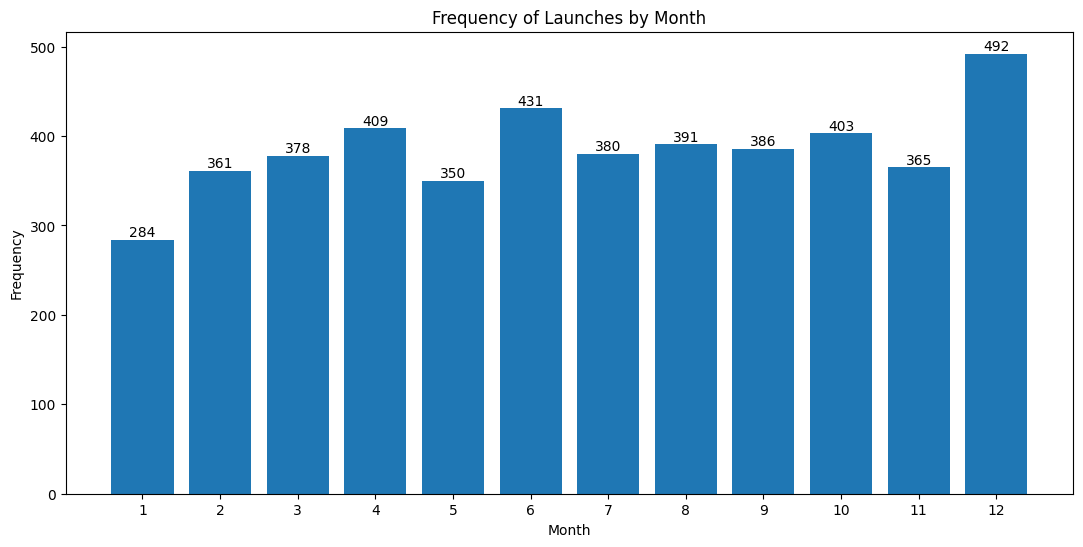

In [109]:
#Create new dataframe for 'Date' column
df_date = df[['Date']]

#Change datatype for datetime format
df_date['Date'] = pd.to_datetime(df_date['Date'])

#Adding column to df_date 
df_date['Month'] = df_date['Date'].dt.month

#check occurrences 'Month'
month_counts = df_date['Month'].value_counts().reset_index()

#Change column name
month_counts.columns = ['Month', 'Frequency']

#Sort by 'Month'
month_counts = month_counts.sort_values(by='Month')

print(month_counts)
print("---------------------")

# Plot the graph
plt.figure(figsize=(13, 6))
bars = plt.bar(year_counts['Month'], year_counts['Frequency'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Launches by Month')
plt.xticks(year_counts['Month'])
plt.savefig('graphs/months_freq.png') #save in 
plt.show()

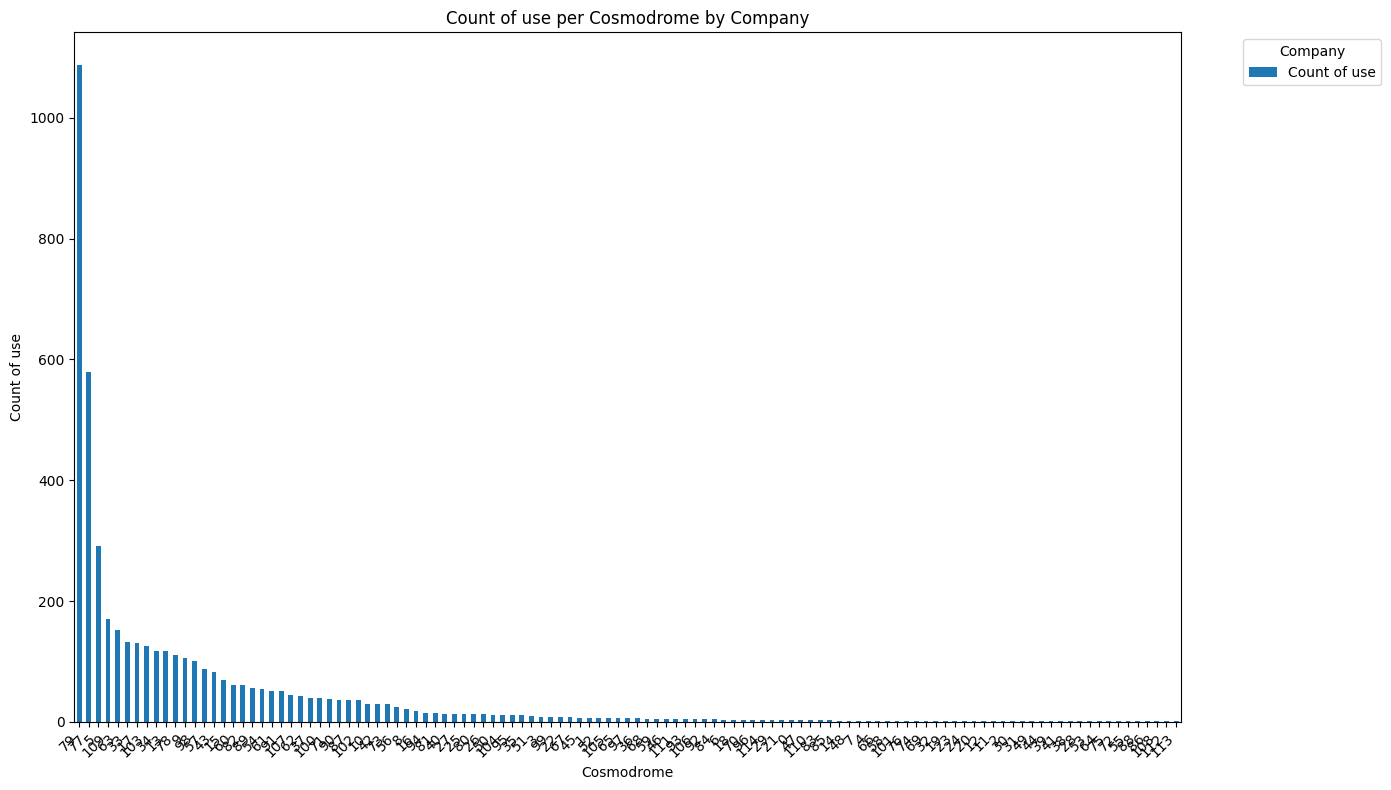

In [152]:
def split_location(location):

#split 'location' on parts containing datas:
    
    parts = location.split(', ')
    
    site = None
    cosmodrome = None
    state = None
    country = None
    
    if len(parts) == 4:
        # Format: site, cosmodrome, state, country
        site = parts[0]
        cosmodrome = parts[1]
        state = parts[2]
        country = parts[3]
    elif len(parts) == 3:
        # Format: site, cosmodrome, country
        site = parts[0]
        cosmodrome = parts[1]
        state = None
        country = parts[2]
    elif len(parts) == 2:
        # Format: cosmodrome, country
        site = None
        cosmodrome = parts[0]
        state = None
        country = parts[1]
    elif len(parts) == 1:
        # Format: country
        site = None
        cosmodrome = None
        state = None
        country = parts[0]
    
    return site, cosmodrome, state, country

df_for_cosmodromes = df.copy()
df_for_cosmodromes[['Site', 'Cosmodrome', 'State', 'Country']] = df['Location'].apply(split_location).apply(pd.Series)

#Create dataframe: group by 'Company' and 'Cosmodrome', count ocurrences in each group, 
grouped_cosmodrome = df_for_cosmodromes.groupby(['Company', 'Cosmodrome']).size().reset_index(name='Count of use')

#Sort by 'Count of use' column
grouped_cosmodrome = grouped_cosmodrome.sort_values(by='Count of use', ascending = False)
grouped_cosmodrome.head(20)
#grouped_cosmodrome.columns


grouped_cosmodrome.plot(kind='bar', stacked=False, figsize=(14, 8))

plt.xlabel('Cosmodrome')
plt.ylabel('Count of use')
plt.title('Count of use per Cosmodrome by Company')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Plotting graph 
#grouped_cosmodrome.head(20).plot(x="Cosmodrome", y=["Count of use"], kind="bar") 